In [1]:
%%capture
!pip install --upgrade netcdf4 colorcet
import os, fnmatch, cv2, numpy as np, pandas as pd, xarray as xr, numba as nb, scipy as sc
import pylab as plt, plotly.express as px, seaborn as sns, colorcet as cc
from matplotlib.colors import from_levels_and_colors as flc; from matplotlib.gridspec import GridSpec

%load_ext google.colab.data_table 
from google.colab import drive; drive.mount( '/content/drive' )

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWj2g5t1rUsu0NQ4ILPgSE9XXin7cnbeD9PNT4VJY37yueh4VNKZD2Q


In [2]:
%%capture
%load_ext rpy2.ipython
from rpy2.robjects.packages import importr
utils = importr( 'utils' )
utils.install_packages( 'segmented', repos = 'https://cloud.r-project.org' )
%R library( segmented )

# AIC BIC python

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/livestock/Digitized_studies.csv', skiprows = 1)
df = df[['plotID', 'Citation', 'studyID', 'Jim_for_using', 'lat', 'long','Mortality', 'Fertility', 'Production','Physiological', '.csv file name']]
df = df[df.Jim_for_using == 'y']
df = df.rename( columns = {'.csv file name':'fname'})
#df = df[df.studyID =='kin4_fou']
df = df[df.Production == 'x']
df.shape

(62, 11)

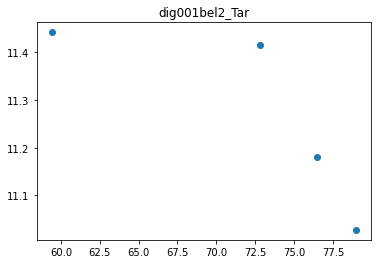

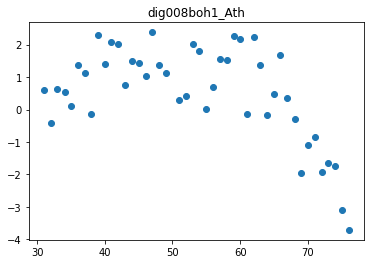

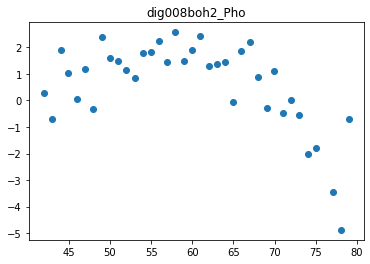

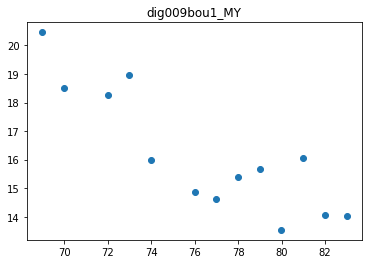

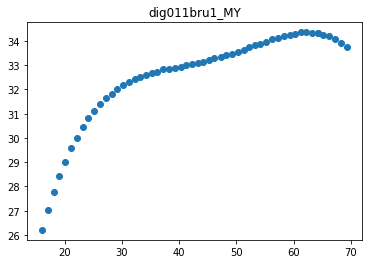

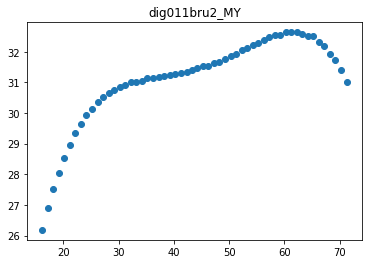

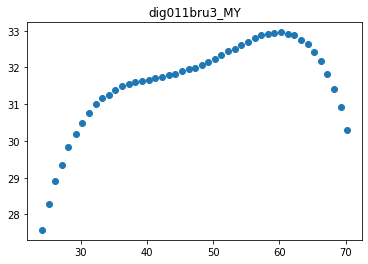

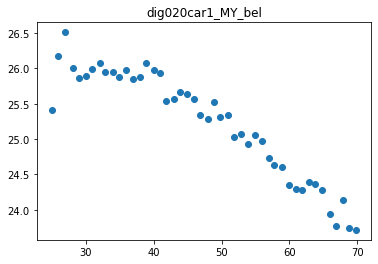

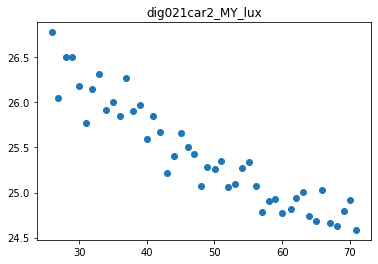

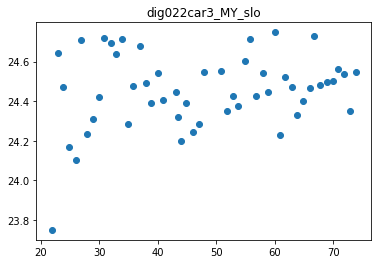

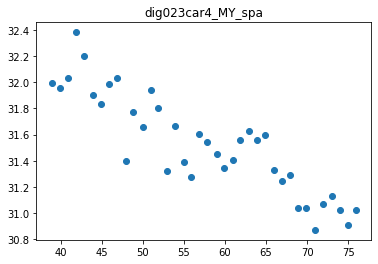

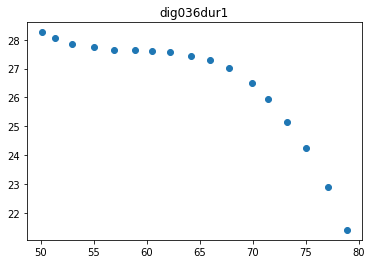

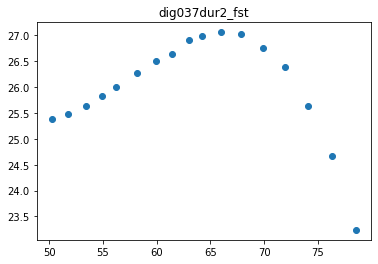

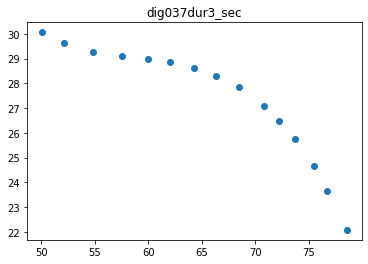

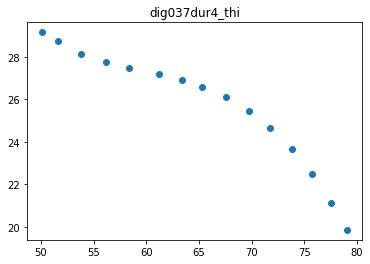

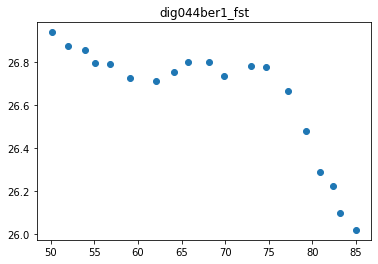

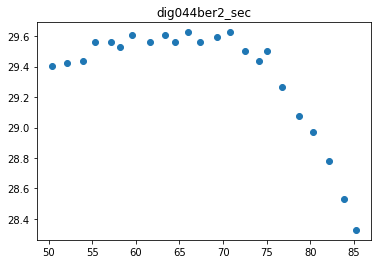

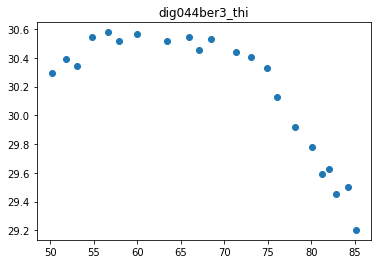

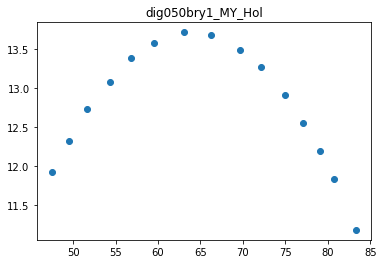

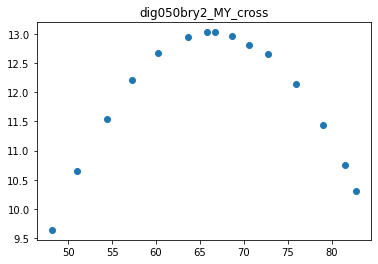

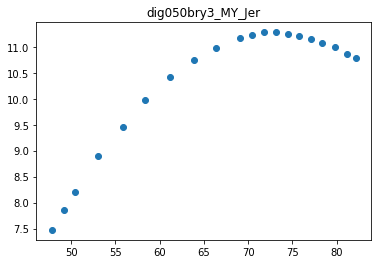

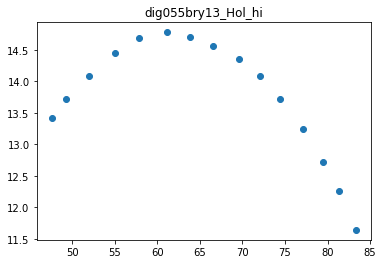

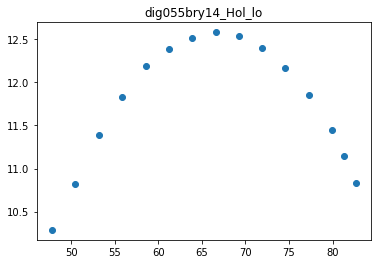

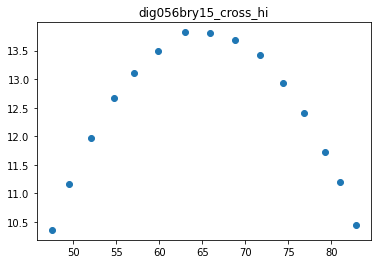

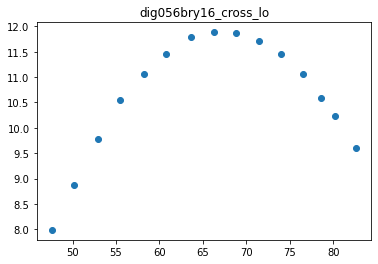

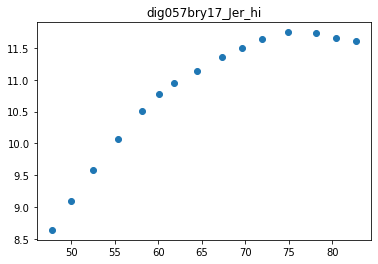

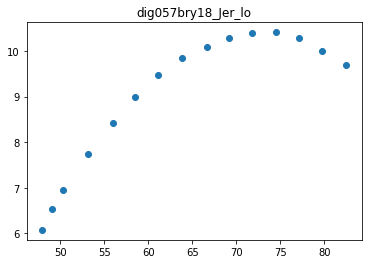

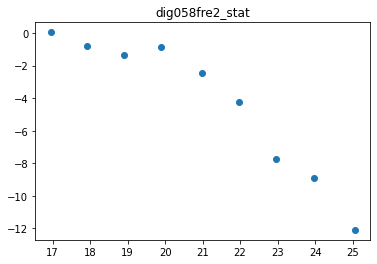

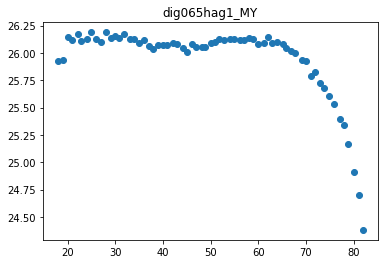

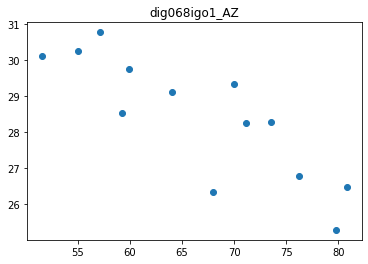

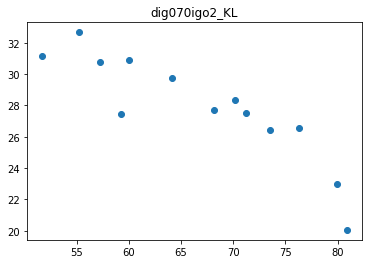

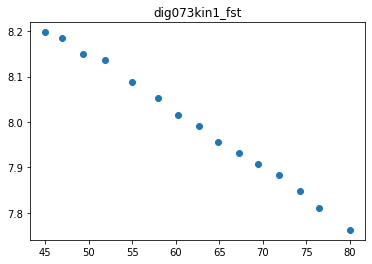

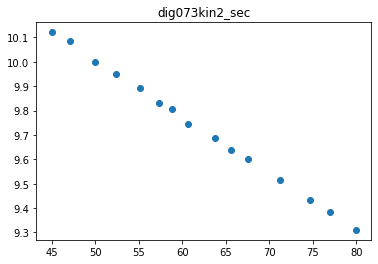

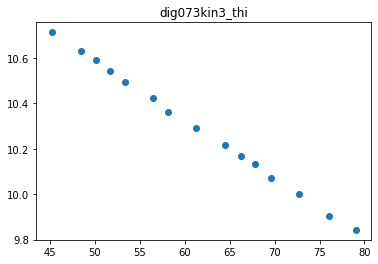

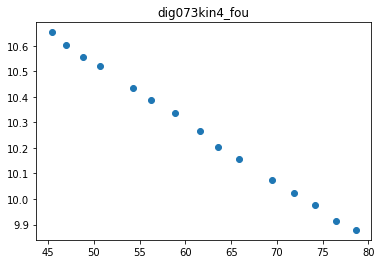

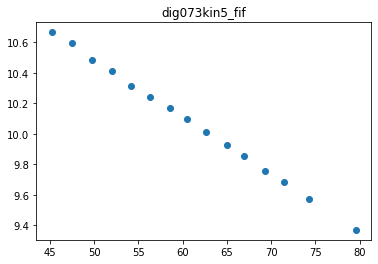

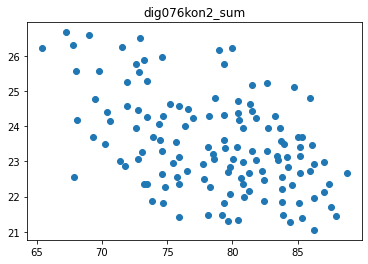

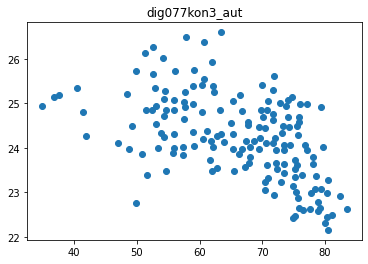

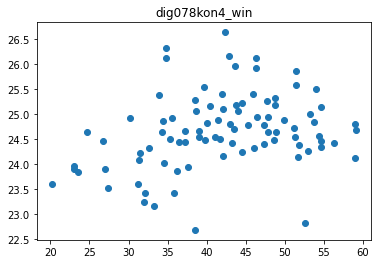

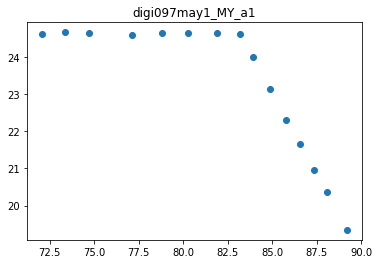

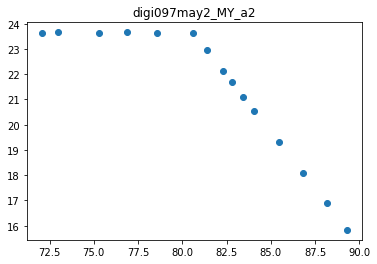

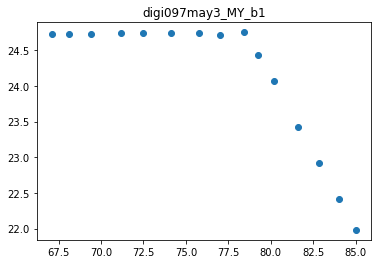

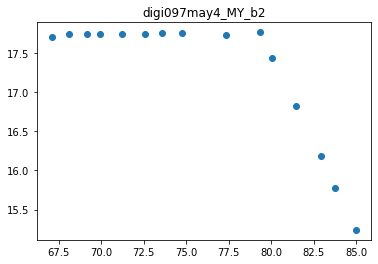

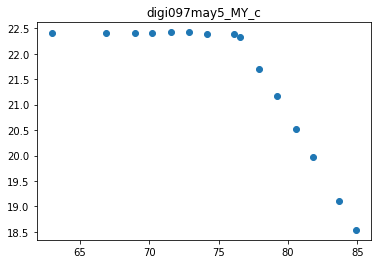

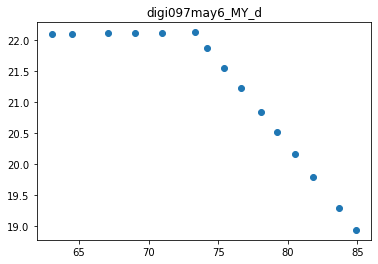

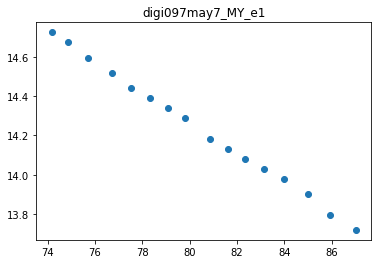

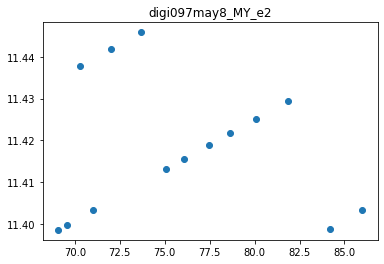

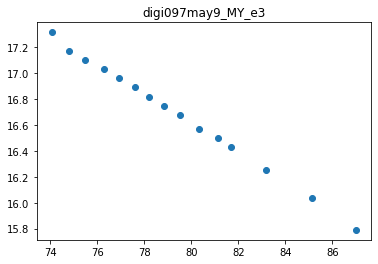

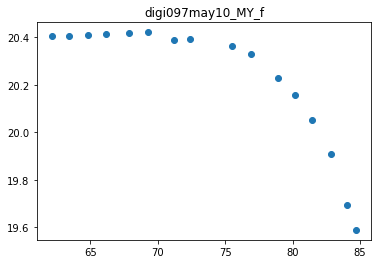

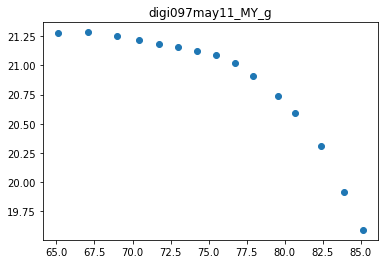

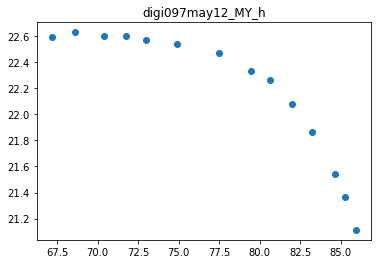

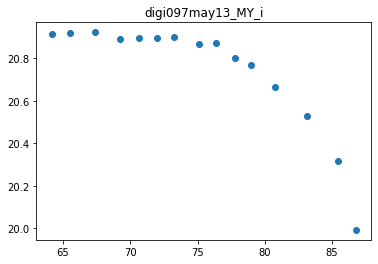

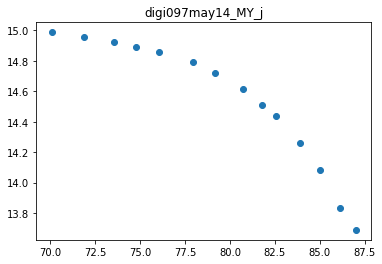

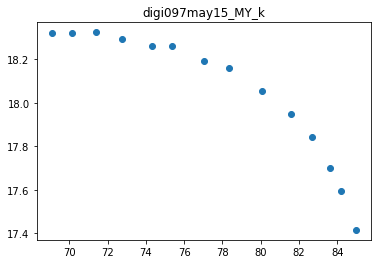

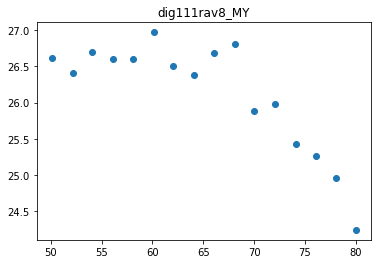

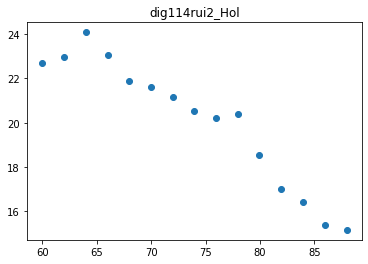

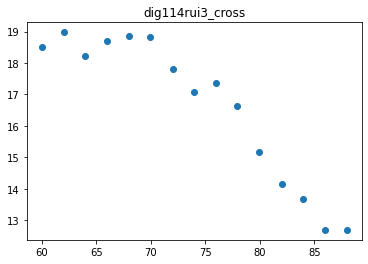

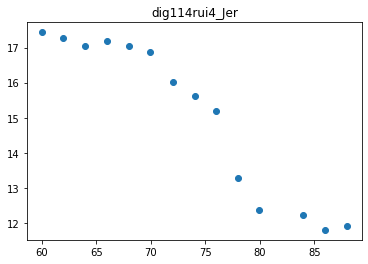

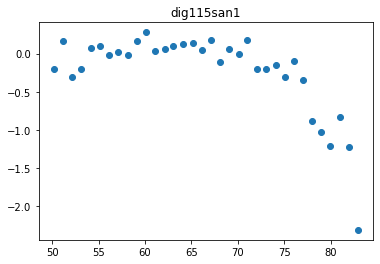

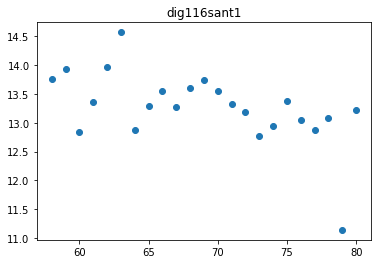

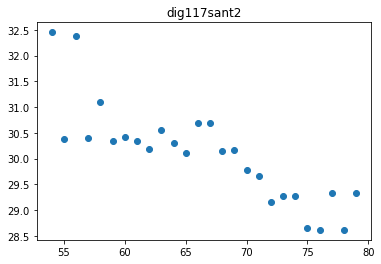

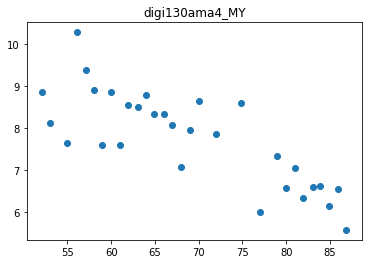

In [ ]:
filelist = df.fname.values
root = '/content/drive/MyDrive/data/livestock/digitized/'

dfo = []
out = []
for file in filelist:
    df1 = pd.read_csv(root + file+'.csv')
    cols = df1.columns
    df1 = df1.rename( columns = {cols[0]:'x', cols[1]:'y'} )
    df1 = df1.sort_values( by = 'x' )
    x = np.array(df1.x)
    y = np.array(df1.y)
    plt.scatter(x,y)
    plt.title(file)
    plt.show()


In [ ]:
root = '/content/drive/MyDrive/data/livestock/digitized/'
filelist = os.listdir( root )
filelist = fnmatch.filter(filelist, '*.csv')
filelist

In [ ]:
root = '/content/drive/MyDrive/data/livestock/digitized/'

dfo = []
out = []
for file in filelist:
    df1 = pd.read_csv(root + file+'.csv')
    cols = df1.columns
    df1 = df1.rename( columns = {cols[0]:'x', cols[1]:'y'} )
    df1 = df1.sort_values( by = 'x' )
    x = np.array(df1.x)
    y = np.array(df1.y)
    #plt.scatter(x,y)
    #plt.title(file)
    out.append({'file':file, 'n':x.shape})

out = pd.DataFrame(out)
out = out.sort_values(by = 'n')

In [ ]:
out

,file,n
0,dig001bel2_Tar,"(4,)"
37,dig061gar1_preg,"(5,)"
77,digi102mor25_beef1_a1,"(8,)"
84,digi102mor32_beef1_a8,"(9,)"
36,dig058fre2_stat,"(9,)"
...,...,...
111,dig120vit1_max,"(63,)"
39,dig065hag1_MY,"(65,)"
49,dig078kon4_win,"(90,)"
47,dig076kon2_sum,"(132,)"


BIC to detect no. of breakpoints
BIC values:
        0         1 
-97.66894 -99.03591 
No. of selected breakpoints:  1  


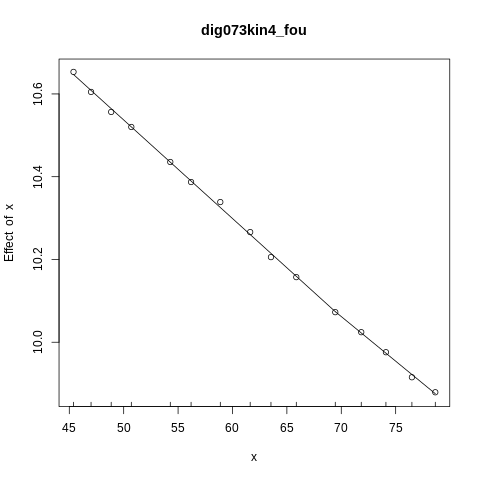

        Initial     Est.   St.Err
psi1.x 61.62687 69.46637 3.158971


In [ ]:
root = '/content/drive/MyDrive/data/livestock/digitized/'

humps = ['dig022car3_MY_slo', 'dig037dur3_sec', 'dig043egb5_lac',
       'dig044ber2_sec', 'dig050bry2_MY_cross', 'dig061gar1_preg',
       'dig073kin2_sec', 'digi097may5_MY_c', 'digi097may8_MY_e2',
       'digi102mor31_beef1_a7', 'dig114rui3_cross', 'dig116sant1']


#humps = ['dig116sant1']
humps = ['dig073kin4_fou']

dfo = []
out = []
for file in humps:
    df1 = pd.read_csv(root + file+'.csv')
    cols = df1.columns
    df1 = df1.rename( columns = {cols[0]:'x', cols[1]:'y'} )
    df1 = df1.sort_values( by = 'x' )
    x = np.array(df1.x)
    y = np.array(df1.y)
    title = file
    try: 
        dataset = df1
        %R -i dataset
        %R -i title
        %R out.lm <- lm( y ~ x, data = dataset )
        %R m <- selgmented( out.lm, Kmax=1, type = "bic" )
        %R p <- plot( m, res = TRUE, main = title)
        %R print(m$psi)
        #%R dev.off()
        #%R -o m
        #%R interc = intercept(m)
        #%R -o interc
        #%R slop = slope(m)
        #%R -o slop
        %R rm(dataset)
        %R rm(m)
        %R rm(out.lm)
        #dfo.append({'file':file,'slope':np.array(slop)[0][:,0], 'interc': np.array(interc)[0]})
        del dataset, df1
    except: 
        plt.close('all')
        plt.scatter(x,y)
        out.append(file)
        print(file, x.shape, 'ERROR')

In [ ]:
my_pwlf = pwlf.PiecewiseLinFit(x, y)
res = my_pwlf.fit( 2 )
#df.append( { 'name':file[:-4], 'endlow':res[0], 'low':res[1], 'high':res[2], 'endhigh':res[3] } )
res

array([61.28844323, 68.71515132, 69.85733325])

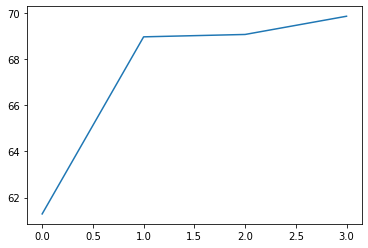

In [ ]:
plt.plot(res)

In [ ]:
humps = ['dig037dur2_fst', 'dig050bry1_MY_Hol', 'dig050bry2_MY_cross',
         'dig055bry13_Hol_hi','dig055bry13_Hol_lo','dig056bry13_cross_hi',
         'dig056bry13_cross_low']

In [ ]:
nobreaks = ['dig002ben1_CR',
'dig061gar1_preg',
'dig068igo1_AZ',
'dig073kin2_sec',
'dig073kin3_thi',
'dig073kin5_fif',
'dig076kon2_sum',
'digi097may7_MY_e1',
'digi097may8_MY_e2',
'digi097may9_MY_e3',
'digi100mor7_dair1_a7',
'digi100mor12_dair1_a12',
'digi102mor31_beef1_a7',
'digi102mor34_beef1_a10',
'dig106dup1',
'digi130ama4_MY',
'dig116sant1',
'dig117sant2',
'dig022car3_MY_slo',
'dig023car4_MY_spa']

file = 'dig023car4_MY_spa'
df1 = pd.read_csv(root + file +'.csv')
cols = df1.columns
df1 = df1.rename( columns = {cols[0]:'x', cols[1]:'y'} )
df1 = df1.sort_values( by = 'x' )
x = np.array(df1.x)
y = np.array(df1.y)
plt.close('all')
plt.scatter(x,y)
plt.title(file)
print(x.min())

In [ ]:
51na
humps = ['dig055bry14_Hol_lo.csv',
'dig050bry1_MY_Hol.csv',
'dig056bry16_cross_lo.csv',
'dig052bry9_PR_Jer.csv',
'dig106dup1.csv',
'dig051bry6_FA_Jer.csv',
'dig056bry15_cross_hi.csv',
'dig053bry11_MS_cross.csv',
'dig052bry8_PR_cross.csv']

In [ ]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color = 'black')

In [ ]:
dfo = pd.DataFrame(dfo)
for file in dfo.file.unique():
    plt.close('all')
    dft = dfo[dfo.file == file]
    df1 = pd.read_csv(root + file)
    cols = df1.columns
    df1 = df1.rename( columns = {cols[0]:'x', cols[1]:'y'} )
    df1 = df1.sort_values( by = 'x' )
    x = np.array(df1.x)
    y = np.array(df1.y)
    plt.scatter( df1.x, df1.y)
    for i in range(dft.slope.values[0].shape[0]): abline(dft.slope.values[0][i], dft.interc.values[0][i])
    plt.title(file)
    plt.savefig( f'/content/drive/My Drive/figures/livestock/digitized/{file[:-4]}.png', dpi = 400, bbox_inches = 'tight', pad_inches = 0 )

In [ ]:
for file in out[1:]:
    plt.close('all')
    df1 = pd.read_csv(root + file)
    cols = df1.columns
    df1 = df1.rename( columns = {cols[0]:'x', cols[1]:'y'} )
    df1 = df1.sort_values( by = 'x' )
    plt.scatter( df1.x, df1.y)
    plt.title(file)
    plt.savefig( f'/content/drive/My Drive/figures/livestock/digitized/{file[:-4]}.png', dpi = 400, bbox_inches = 'tight', pad_inches = 0 )
    

In [ ]:
id = 1
df1 = pd.read_csv(root + filelist[id])
cols = df1.columns
df1 = df1.rename(columns = {cols[0]:'x',cols[1]:'y'})
df1 = df1.sort_values(by='x')
x = np.array(df1.x)
y = np.array(df1.y)
plt.scatter( x, y )

regr = OLS( y, add_constant( x)  ).fit()
print('linear', regr.bic, regr.aic)

In [ ]:
dfa = []
df1 = pd.read_csv(root + filelist[id])
cols = df1.columns
df1 = df1.rename(columns = {cols[0]:'x',cols[1]:'y'})
df1 = df1.sort_values(by='x')
xs = np.array(df1.x)
for i in xs[2:-3]:
    df = df1[ df1.x <= i ]
    regr1 = OLS( np.array(df.y), add_constant( np.array(df.x) )  ).fit()

    df = df1[ df1.x > i ]
    regr2 = OLS( np.array(df.y), add_constant( np.array(df.x) )  ).fit()

    dfa.append( { 'bp':i,'bic':(regr1.bic+regr2.bic)/2,'aic':(regr1.aic+regr2.aic)/2 } )

dfa = pd.DataFrame(dfa)
plt.plot(dfa.bp, dfa.bic)
plt.plot(dfa.bp, dfa.aic)

In [ ]:
dfa = []
df1 = pd.read_csv(root + filelist[id])
cols = df1.columns
df1 = df1.rename(columns = {cols[0]:'x',cols[1]:'y'})
df1 = df1.sort_values(by='x')
xs = np.array(df1.x)

for i in xs[2:-3]:
    x2 = np.array(df1[ df1.x > i ].x.values)
    x2 = x2[1:-3]
    for j in x2:

        df = df1[ df1.x <= i ]
        regr1 = OLS( np.array(df.y), add_constant( np.array(df.x) )  ).fit()

        df = df1[ df1.x.between(i,j) ]
        regr2 = OLS( np.array(df.y), add_constant( np.array(df.x) )  ).fit()

        df = df1[ df1.x>=j ]
        regr3 = OLS( np.array(df.y), add_constant( np.array(df.x) )  ).fit()

        dfa.append( { 'bp1':i,'bp2':j,'bic':np.median([regr1.bic+regr2.bic+regr3.bic]),'aic':np.median([regr1.aic+regr2.aic+regr3.aic]) } )

dfa = pd.DataFrame(dfa)

dfp = dfa[['bp1','bp2','aic']]
dfp.bp1 = np.round(dfp.bp1,2)
dfp.bp2 = np.round(dfp.bp2,2)
dfp = dfp.pivot(index='bp1', columns='bp2')
dfp.columns = dfp.columns.get_level_values(1)
sns.heatmap(dfp, cmap="YlGnBu")

In [ ]:
root = '/content/drive/MyDrive/data/livestock/digitized/'
filelist = os.listdir( root )
id = 1
df1 = pd.read_csv(root + filelist[id])
cols = df1.columns
df1 = df1.rename(columns = {cols[0]:'x',cols[1]:'y'})
df1 = df1.sort_values(by='x')
x = np.array(df1.x)
y = np.array(df1.y)
plt.scatter( x, y )

In [ ]:
dataset = df1
%R -i dataset
%R out.lm <- lm( y ~ x, data = dataset )
%R m <- selgmented( out.lm, Kmax=3, type = "bic" )
%R -o m

In [ ]:
m

# load in csv's digitized by Birgitt

In [ ]:
root = '/content/drive/MyDrive/data/livestock/digitized/'
filelist = os.listdir( root )
df = []
print(len(filelist))
for file in filelist:
    df1 = pd.read_csv(root + file)
    cols = df1.columns
    x = np.array(df1[cols[0]])
    y = np.array(df1[cols[1]])

    try: 
        my_pwlf = pwlf.PiecewiseLinFit(x, y)
        res = my_pwlf.fit( 3 )
        df.append( { 'name':file[:-4], 'endlow':res[0], 'low':res[1], 'high':res[2], 'endhigh':res[3] } )
    except: pass

df = pd.DataFrame(df)
dig = df.name.unique()
ds = pd.read_csv('/content/drive/MyDrive/data/livestock/Digitized_studies_.csv', skiprows=1).rename(columns ={'.csv file name':'name'})
dig1 = ds.name.unique()
df = pd.merge(df, ds, on = 'name')
df = df[['name','endlow','low','high','endhigh','Citation']]
print(df.shape)

df1 = pd.read_csv('/content/drive/My Drive/data/livestock/impacts _observational_feb2021.csv' )
df1 = df1[['Citation','lat','lon','thieq', 'Species for Jim','Jim_for using','Cattle breed type','day_3day_month', 'mean_or_max','Mortality (Y/N)','Fertility (Y/N)','Production (Y/N)']]
df1 = df1.replace({'cattle ':'cattle'})
df1 = df1[df1['Species for Jim'] == 'cattle']
#df1 = df1[df1['Jim_for using'] == 'Y']
df1 = df1[df1.mean_or_max != 'min']
df1 = df1.drop_duplicates( subset = 'Citation' )
df1 = df1.replace({'Ravagnolo and Misztal (2000)':'Ravagnolo and Misztal (2002)', 'Bryant et al.  2007':'Bryant et al. 2007' })
obs = df1.Citation.unique()

df = pd.merge(df, df1, on = ['Citation'], how = 'left')
df = df.rename( columns = {'high':'Jim_breakpoint'} )

df.thieq = df.thieq.fillna('THI = (1.8 × Tdb + 32) - [(0.55 - 0.0055 × RH) × (1.8 × Tdb - 26)]')

print(df.shape)
df.head(10)

In [ ]:
list(set(dig) - set(dig1))

In [ ]:
df['ta'] = 25
df['rh'] = 50
### Wet bulb from Stull, 2011 Journal of Applied Meterology and Climatology, Equation 1 ###
df['wb'] = df.ta * np.arctan( 0.151977 * (df.rh + 8.313659)**(1/2) ) + np.arctan(df.ta+ df.rh) - np.arctan(df.rh - 1.676331) + 0.00391838 * (df.rh)**(3/2) * np.arctan(0.023101 * df.rh) - 4.686035
### Dewpoint from XXXX ###
df['dp'] = 243.5 * (np.log( df.rh / 100 ) + ( ( 17.67 * df.ta ) / ( 243.5 + df.ta ) ) ) / ( 17.67 - np.log(df.rh/100) - ( ( 17.67 * df.ta ) / ( 243.5 + df.ta ) ) )

labs = ['THI =','THI=','THI_mon =','HSI = ','THI1 = ','THI2 = ','THI3 = ','THI4 = ','THI5 = ','THI6 = ','THI7= ','THIRa = ','THIBo = ']
for lab in labs: df.thieq = df.thieq.str.replace(lab,'', case = False)

df.thieq = df.thieq.str.replace('×','*', case = False)
df.thieq = df.thieq.str.replace('X','*', case = False)
df.thieq = df.thieq.str.replace('\[','(', case = False)
df.thieq = df.thieq.str.replace('\]',')', case = False)
df.thieq = df.thieq.str.replace('%','', case = False)

df.thieq = df.thieq.str.replace('RH','df.rh', case = False)
df.thieq = df.thieq.str.replace('Tdp','df.dp', case = False)
df.thieq = df.thieq.str.replace('Twb','df.wb', case = False)
labs = ['TaC','Tave','Tdb','TDB','Ta','AT','T']
for lab in labs: df.thieq = df.thieq.str.replace(lab,'df.ta', case = True)

test = []
for i in df.index: test.append({'id':i, 'thi':pd.eval( df[df.index == i].thieq )[0,0]})
test = pd.DataFrame( test )
test.index = test['id']
df = pd.merge(df, test, left_index = True, right_index = True )
df['thi_adjust'] = df.thi.mode().values[0] - df.thi 
df['breakpoint'] = df.Jim_breakpoint + df.thi_adjust
df = df.sort_values( by = 'Citation', ascending = False )
df.head(3)

### get baseline climate info from the HADisd ###
sta = pd.read_fwf('/content/drive/My Drive/data/livestock/hadisd_station_fullinfo_v311_202001p.txt',
                  colspecs = [(0,11),(12,42),(43,50),(51,59),(60,67),(68,78),(79,89)],
                  names = ['ID','name','lat','lon','elv','start_date','end_date'])
sta = pd.read_fwf('/content/drive/My Drive/data/livestock/hadisd_station_info_v311_202008p.txt',
                  colspecs = [(0,11),(12,19),(20,29),(30,39)], names = ['ID','lat','lon','elv'])

sta = sta.dropna()
new = sta.copy()

def get_path(sid):
    files = ['080000-099999','000000-029999','030000-049999','450000-499999','650000-699999','400000-449999',
            '350000-399999','300000-349999','200000-249999','250000-299999','100000-149999','150000-199999',
            '050000-079999','550000-599999','600000-649999','500000-549999','700000-709999','720000-722999',
            '710000-719999','723000-723999','726000-726999','725000-725999','724000-724999','730000-799999',
            '800000-849999','950000-999999','900000-949999','850000-899999','727000-729999']

    bins = np.zeros((len(files),2))
    for i, file in enumerate(files): bins[i,:] = np.array(file.split('-'), dtype=int) 

    sidn = np.int(sid[:6])
    for i,j in bins: 
        if (sidn > i) & (sidn < j): out = i,j
        else: pass
    
    b1 = out[0].astype(int).astype(str)
    b2 = out[1].astype(int).astype(str)

    if len(b1) == 5: 
        b1 = '0'+ b1
        b2 = '0'+ b2
    else: pass

    path = f'/content/drive/My Drive/data/livestock/HadISD/WMO_{b1}-{b2}_heat_stress/hadisd.3.1.1.202008p_19310101-20200901_{sid+sid[-1]}_heat_stress.nc'
    ds = xr.open_dataset( path )
    ds = ds.temperature_humidity_index

    ds = ds.where( (ds > 0) & (ds < 150) )
    thimax   = ds.resample( time = '1D' ).max().mean().values
    thimean  = ds.resample( time = '1D' ).mean().mean().values
    #thimin   = ds.resample( time = '1D' ).min().mean().values
    #thimean3 = ds.resample( time = '3D' ).mean().mean().values
    return thimax, thimean#, thimin, thimean3

l = []
for index, row in df.iterrows():
    new['latlon'] = np.abs( new.lat-row.lat ) + np.abs( new.lon-row.lon )
    new.sort_values( 'latlon' , inplace=True)
    try: l.append(get_path(new.iloc[0].ID))
    except: 
        try: l.append(get_path(new.iloc[1].ID))
        except: 
            try: l.append(get_path(new.iloc[2].ID))
            except: 
                try: l.append(get_path(new.iloc[3].ID))
                except:
                    try: l.append(get_path(new.iloc[4].ID))
                    except: 
                        try: l.append(et_path(new.iloc[5].ID))
                        except: l.append(get_path(new.iloc[6].ID))

l = np.array(l)
df['thimax'] = l[:,0]
df['thimean'] = l[:,1]
#df['thimin'] = l[:,2]
#df['thimin3d'] = l[:,3]

df.to_csv('/content/drive/My Drive/data/livestock/digitized_breakpoints_with_min_mean_max.csv', index = False )

In [ ]:
### adjust the max's ---> means ###
df = pd.read_csv( '/content/drive/My Drive/data/livestock/HadISD/breakpoints_with_min_mean_max.csv' )
dfmax = df[df.mean_or_max == 'max']
dfmax['break_adj'] = dfmax.breakpoint - (dfmax.thimax - dfmax.thimean)
dfmean = df[df.mean_or_max != 'max']
dfmean['break_adj'] = dfmean.breakpoint
df = pd.concat( ( dfmax, dfmean ) )
mort = df[df['Mortality (Y/N)'] == 'Y'].break_adj.median()
fer = df[df['Fertility (Y/N)'] == 'Y'].break_adj.median()
pro = df[df['Production (Y/N)'] == 'Y'].break_adj.median()
print(mort, fer, pro)

In [ ]:
df.break_adj.median()

In [ ]:
plt.hist(df.break_adj.values)

In [ ]:
### adjust the max's ---> means ###
df = pd.read_csv( '/content/drive/My Drive/data/livestock/digitized_breakpoints_with_min_mean_max.csv' )
dfmax = df[df.mean_or_max == 'max']
dfmax['break_adj'] = dfmax.breakpoint - (dfmax.thimax - dfmax.thimean)
dfmean = df[df.mean_or_max != 'max']
dfmean['break_adj'] = dfmean.breakpoint
df = pd.concat( ( dfmax, dfmean ) )
df.break_adj.median()
df

In [ ]:
dfa = df.copy()

In [ ]:
np.sin()

In [ ]:
plt.hist(df.break_adj.values)

In [ ]:
mort = df[df['Mortality (Y/N)'] == 'Y'].shape#.break_adj.mean()
fer = df[df['Fertility (Y/N)'] == 'Y'].shape#.break_adj.mean()
pro = df[df['Production (Y/N)'] == 'Y'].shape#.break_adj.mean()
print(mort, fer, pro)

In [ ]:
mort = df[df['Mortality (Y/N)'] == 'Y'].break_adj.median()
fer = df[df['Fertility (Y/N)'] == 'Y'].break_adj.median()
pro = df[df['Production (Y/N)'] == 'Y'].break_adj.median()
print(mort, fer, pro)

## plot figures

In [ ]:
dfa = df.copy()

In [ ]:
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    results['polynomial'] = coeffs.tolist()
    correlation = np.corrcoef(x, y)[0,1]
    results['correlation'] = correlation
    results['determination'] = correlation**2
    return results

polyfit(x,y,1)['determination']

In [ ]:
m = sc.stats.linregress(x,y)
m.rvalue**2
m.pvalue

In [ ]:
root = '/content/drive/MyDrive/data/livestock/digitized/'
filelist = os.listdir( root )
filelist = np.where(filelist)

In [ ]:
root = '/content/drive/MyDrive/data/livestock/digitized/'
filelist = os.listdir( root )
df = []
for file in filelist:
    print(file)
    df1 = pd.read_csv(root + file)
    cols = df1.columns
    x = np.array( df1[cols[0]] )
    y = np.array( df1[cols[1]] )
    dft = dfa[dfa.name == file[:-4] ]
    try:
        if dft['Production (Y/N)'].unique()[0] == 'Y': case = 'Production'
        elif dft['Fertility (Y/N)'].unique()[0] == 'Y': case = 'Fertility'
        elif dft['Mortality (Y/N)'].unique()[0] == 'Y': case = 'Mortality'
    except: 
        case = 'unk'

    try: 
        n = x.shape[0]
            
        m = sc.stats.linregress(x,y)
        r21 = m.rvalue**2
        pv = m.pvalue
        xmin = x.min()

        my_pwlf = pwlf.PiecewiseLinFit(x, y)
        res2 = my_pwlf.fit( 2 )
        r22 = my_pwlf.r_squared()
        adjR2 = 1 - ((1-r22)*(n-1))/(n - 2 - 1)

        my_pwlf3 = pwlf.PiecewiseLinFit(x, y)
        res3 = my_pwlf3.fit( 3 )
        r23 = my_pwlf3.r_squared()
        adjR3 = 1 - ((1-r23)*(n-1))/(n - 4 - 1)
        df.append({'name':file[:-4],'case':case,'lin':xmin,'r21':r21,'pvalue':pv,'twoseg':res2[1],'r22':adjR2,'three_low':res3[1], 'three_high':res3[2], 'r23': adjR3})
    except: pass

df = pd.DataFrame(df)
df.head(3)

In [ ]:
df[df.r21 > df.r22]

In [ ]:
root = '/content/drive/MyDrive/data/livestock/digitized/'
filelist = os.listdir( root )
df = []
for file in filelist:
    print(file)
    df1 = pd.read_csv(root + file)
    cols = df1.columns
    x = np.array( df1[cols[0]] )
    y = np.array( df1[cols[1]] )
    dft = dfa[dfa.name == file[:-4] ]
    try:
        if dft['Production (Y/N)'].unique()[0] == 'Y': case = 'Production'
        elif dft['Fertility (Y/N)'].unique()[0] == 'Y': case = 'Fertility'
        elif dft['Mortality (Y/N)'].unique()[0] == 'Y': case = 'Mortality'
    except: 
        case = 'unk.'

    try: 
        plt.close('all')
        fig = plt.figure( figsize = ( 4, 4 ) )
        plt.title(f'{file[:-4]} - {case}')
        plt.plot(x, y, 'o', color = 'gray')
        yrange = (y.max() - y.min()) * 0.05
        '''
        xHat = np.linspace(min(x), max(x), num=10000)
        plt.annotate(np.round(x.min(),1), xy = (x.min(), y.mean()), color = 'blue')
        plt.annotate(np.round(polyfit(x,y,1)['determination'],4), xy = (x.min(), y.mean()-yrange*2), color = 'blue')

        n = x.shape[0]
        my_pwlf = pwlf.PiecewiseLinFit(x, y)
        res = my_pwlf.fit( 2 )
        yHat = my_pwlf.predict(xHat)
        plt.plot(xHat, yHat, '-', color = 'black')
        plt.annotate(np.round(res[1],1), xy = (res[1], y.mean()), color = 'black')
        r2 =  1 - ((1-my_pwlf.r_squared())*(n-1))/(n - 4 - 1)
        plt.annotate(np.round(r2,4), xy = (x.min(), y.min()), color = 'black')

        my_pwlf = pwlf.PiecewiseLinFit(x, y)
        res = my_pwlf.fit( 3 )
        yHat = my_pwlf.predict(xHat)
        plt.plot(xHat, yHat, '-', color = 'red')
        plt.annotate(np.round(res[1],1), xy = (res[1], y.mean()), color = 'red')
        plt.annotate(np.round(res[2],1), xy = (res[2], y.mean()), color = 'red')
        r2 =  1 - ((1-my_pwlf.r_squared())*(n-1))/(n - 4 - 1)
        plt.annotate(np.round(r2,4), xy = (x.mean(), y.min()), color = 'red')
        plt.savefig( f'/content/drive/My Drive/figures/livestock/digitized/{file[:-4]}.png', dpi = 400, bbox_inches = 'tight', pad_inches = 0 )
        '''
    except: pass


In [ ]:
my_pwlf.r_squared()

In [ ]:
np.

In [ ]:
root = '/content/drive/MyDrive/data/livestock/digitized/'
filelist = os.listdir( root )
df = []
for file in filelist:
    df1 = pd.read_csv(root + file)
    cols = df1.columns
    x = np.array(df1[cols[0]])
    y = np.array(df1[cols[1]])
    dft = dfa[dfa.name == file[:-4] ]
    try:
        if dft['Production (Y/N)'].unique()[0] == 'Y': color = 'black'
        elif dft['Fertility (Y/N)'].unique()[0] == 'Y': color = 'blue'
        elif dft['Mortality (Y/N)'].unique()[0] == 'Y': color = 'red'
    except: 
        color = 'green'

    try: 
        my_pwlf = pwlf.PiecewiseLinFit(x, y)
        res = my_pwlf.fit( 3 )

        xHat = np.linspace(min(x), max(x), num=10000)
        yHat = my_pwlf.predict(xHat)

        plt.close('all')
        fig = plt.figure( figsize = ( 4, 4 ) )
        plt.plot(x, y, 'o', color = 'gray')
        plt.plot(xHat, yHat, '-', color = color)
        plt.savefig( f'/content/drive/My Drive/figures/livestock/digitized/{file[:-4]}.png', dpi = 400, bbox_inches = 'tight', pad_inches = 0 )

    except: pass


In [ ]:
root = '/content/drive/MyDrive/data/livestock/digitized/'
filelist = os.listdir( root )
df = []
for file in filelist:
    df1 = pd.read_csv(root + file)
    cols = df1.columns
    X = np.array(df1[cols[0]]).reshape(-1, 1)
    y = np.array(df1[cols[1]])

    try: 
        model = PiecewiseRegressor( verbose = False, binner = KBinsDiscretizer( n_bins = 3, strategy = 'kmeans' ) )
        model.fit( X, y )

        plt.close('all')
        fig = plt.figure( figsize = ( 4, 4 ) )
        plt.plot(X[:, 0], y, 'o', color = 'gray')
        X = np.sort(X)
        pred = model.predict( X ) 
        plt.plot(X[:, 0], pred, '-', color = 'black')
        plt.savefig( f'/content/drive/My Drive/figures/livestock/digitized_regressions2/{file[:-4]}.png', dpi = 400, bbox_inches = 'tight', pad_inches = 0 )

    except: pass


In [ ]:
%%capture
!pip install mlinsights
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.svm import SVR
from mlinsights.mlmodel import PiecewiseRegressor
from statsmodels.nonparametric.smoothers_lowess import lowess as sm_lowess

!pip install pwlf
import pwlf

from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

In [ ]:

!pip install pwlf
import pwlf

  Created wheel for pwlf: filename=pwlf-2.0.4-cp37-none-any.whl size=16143 sha256=e0b432c09da91370a7766ee24f364f26340ba5e8f095871d280b1a87b176db82
  Stored in directory: /root/.cache/pip/wheels/aa/b4/ef/2cb67a24a71a0d9dd93a5ba02f46106e9fa34dd2e3d9d8b4a0
  Created wheel for pyDOE: filename=pyDOE-0.3.8-cp37-none-any.whl size=18178 sha256=3d938094ffadaa836cdbb147ff945ada69db59bc03559c18d6ca69b46eccf9c0
  Stored in directory: /root/.cache/pip/wheels/7c/c8/58/a6493bd415e8ba5735082b5e0c096d7c1f2933077a8ce34544
Successfully built pwlf pyDOE


#OLD

In [ ]:
df.high = df.high.apply( lambda x: x * 9/5 + 32 if x < 40 else x )
plt.hist( df.high.values, bins = 15 )

In [ ]:
root = '/content/drive/MyDrive/data/livestock/digitized/'
filelist = os.listdir( root )
df = pd.DataFrame({})

for file in filelist:
    df1 = pd.read_csv(root + file)
    df1['THIID'] = df1.columns[0]
    df1['impactID'] = df1.columns[1]    
    df1.columns = ['THI','impact','THIID','impactID']
    df1['name'] = file.strip('.csv')
    df = pd.concat( [df, df1] )

# one fertility study with binned THI
df = df[df.impactID != '% pregnancy loss']
df.THI = pd.to_numeric(df.THI)

df.head(3)

In [ ]:
fig = plt.figure( figsize = ( 8, 6 ) )
sns.scatterplot( df.THI, df.impact, hue = df.name, legend = False )
sns.despine()

# Data cleaning

In [ ]:
df['means'] = df.groupby(['name'], as_index=False)['impact'].transform('mean')
df['stds'] = df.groupby(['name'], as_index=False)['impact'].transform('std')
df['impact_corrected'] =  (df.impact - df.means) / df.stds

fig = plt.figure( figsize = ( 8, 6 ) )
sns.scatterplot(df.THI, df.impact_corrected, hue = df.name, legend=False)
sns.despine()

In [ ]:
df['thimean'] = df.groupby(['name'], as_index = False )['THI'].transform('mean')
dfc = df[df.thimean < 30]
df = df[df.thimean > 30]

dfc['THI'] = dfc.THI * 1.8 + 32
df = pd.concat([df,dfc])

fig = plt.figure( figsize = ( 8, 6 ) )
sns.scatterplot(df.THI, df.impact_corrected, hue = df.name, legend=False)
sns.despine()

In [ ]:
df.impactID.unique()

In [ ]:
morts = ['Odds of mortality', 'RR', 'Pregnancy per AI (%)','THI']
dfd = df[df.impactID.isin(morts)]
df = df[~df.impactID.isin(morts)]
fig = plt.figure( figsize = ( 8, 6 ) )
sns.scatterplot(df.THI, df.impact_corrected, hue = df.name, legend=False)
sns.despine()

In [ ]:
df.sort_values('impact_corrected', ascending=False).head(4)

In [ ]:
sns.scatterplot(dfd.THI, dfd.impact_corrected, hue = dfd.name, legend=False)
sns.despine()

In [ ]:
dfd

# Modeling

# Piecewise linear

In [ ]:
x = np.array(df.THI)
y = np.array(df.impact_corrected)

def piecewise_linear(x, x0, x1, b, k1, k2, k3):
    condlist = [x < x0, (x >= x0) & (x < x1), x >= x1]
    funclist = [lambda x: k1*x + b, lambda x: k1*x + b + k2*(x-x0), lambda x: k1*x + b + k2*(x-x0) + k3*(x - x1)]
    return np.piecewise(x, condlist, funclist)

p , e = sc.optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(10, 90, 1000)

fig = plt.figure( figsize = ( 8, 6 ) )
plt.scatter(x, y, s = 10, color = 'gray')
plt.plot(xd, piecewise_linear(xd, *p), color = 'black')

In [ ]:
X = np.array(df.THI).reshape(-1, 1)
y = np.array(df.impact_corrected)
#X_train, X_test, y_train, y_test = train_test_split(X, y)

model = PiecewiseRegressor( verbose = True, binner = DecisionTreeRegressor( min_samples_leaf = 300) )
model.fit( X, y )

pred = model.predict(X)

fig = plt.figure( figsize = ( 8, 6 ) )
plt.scatter(X[:, 0], y, s = 10, color = 'gray', alpha = 0.5)
plt.scatter(X[:, 0], pred,  s = 10, color = 'black')

In [ ]:
X = np.array(df.THI).reshape(-1, 1)
y = np.array(df.impact_corrected)
#X_train, X_test, y_train, y_test = train_test_split(X, y)

model = PiecewiseRegressor( verbose = True, binner = KBinsDiscretizer( n_bins = 3, strategy = 'kmeans' ) )
model.fit( X, y )

pred = model.predict( X ) 
fig = plt.figure( figsize = ( 8, 6 ) )

plt.scatter(X[:, 0], y, s = 10, color = 'gray', alpha = 0.5)
plt.scatter(X[:, 0], pred,  s = 10, color = 'black')

# LOWESS

In [ ]:
x = np.array(df.THI)
y = np.array(df.impact_corrected)

In [ ]:
sm_x, sm_y = sm_lowess(y, x,  frac=1/3,  it=5, return_sorted = True).T
fig = plt.figure( figsize = ( 8, 6 ) )
plt.scatter(x, y, facecolors = 'gray', edgecolors='none', zorder = 0, s=10)
plt.plot(sm_x, sm_y, color='black', lw = 4)

In [ ]:
def smooth(x, y, xgrid):
    samples = np.random.choice(len(x), 50, replace=True)
    y_s = y[samples]
    x_s = x[samples]
    y_sm = sm_lowess(y_s, x_s, frac=1/3, it=5, return_sorted = False)
    # regularly sample it onto the grid
    y_grid = sc.interpolate.interp1d(x_s, y_sm, fill_value='extrapolate')(xgrid)
    return y_grid

xgrid = np.linspace(x.min(),x.max())
K = 100
smooths = np.stack([smooth(x, y, xgrid) for k in range(K)]).T

mean = np.nanmean(smooths, axis=1)
stderr = sc.stats.sem(smooths, axis=1)
stderr = np.nanstd(smooths, axis=1, ddof=0)

fig = plt.figure( figsize = ( 8, 6 ) )
plt.scatter(x, y, facecolors = 'gray', edgecolors='none', zorder = 0, s = 10)
plt.fill_between(xgrid, mean-1.96*stderr, mean+1.96*stderr, alpha=0.25)
plt.plot(xgrid, mean, color='black', lw = 4)

# Support Vector regression

In [ ]:
X = np.array(df.THI).reshape(-1, 1)
y = np.array(df.impact_corrected)
model = SVR(kernel='rbf', C=100, gamma=0.001, epsilon=.1, )
model.fit( X, y )
pred = model.predict(X)

fig = plt.figure( figsize = ( 8, 6 ) )
plt.scatter(X[:, 0], y, s = 10, color = 'gray', alpha = 0.5)
plt.scatter(X[:, 0], pred,  s = 10, color = 'black')

# fit models separately

In [ ]:
colors = cc.glasbey

fig = plt.figure( figsize = ( 10, 8 ) )
for i, name in enumerate(df.name.unique()):
    dft = df[df.name == name]
    dft = dft.sort_values('THI')
    X = np.array(dft.THI).reshape(-1, 1)
    y = np.array(dft.impact_corrected)
    model = SVR(kernel='rbf', C=100, gamma=0.001, epsilon=.1, )
    model.fit( X, y )
    pred = model.predict(X)
    plt.scatter(X[:, 0], y, s = 5, color = 'gray', alpha = 0.5)
    plt.plot(X[:, 0], pred, color = colors[i] )

In [ ]:
colors = cc.glasbey

fig = plt.figure( figsize = ( 10, 8 ) )
for i, name in enumerate(df.name.unique()):
    dft = df[df.name == name]
    dft = dft.sort_values('THI')
    X = np.array(dft.THI).reshape(-1, 1)
    y = np.array(dft.impact) 
    model = SVR(kernel='rbf', C=100, gamma=0.005, epsilon=.1, )
    model.fit( X, y )
    pred = model.predict(X)
    plt.scatter(X[:, 0], y, s = 5, color = 'gray', alpha = 0.5)
    plt.plot(X[:, 0], pred, color = colors[i] )

#plt.ylim(-50,1)

# percent change from maximum

In [ ]:
colors = cc.glasbey

fig = plt.figure( figsize = ( 10, 8 ) )
for i, name in enumerate(df.name.unique()):
    dft = df[df.name == name]
    dft = dft.sort_values('THI')
    X = np.array(dft.THI).reshape(-1, 1)
    y = np.array(dft.impact) 
    y = ((y - y.max()) / y.max()) * 100
    model = SVR(kernel='rbf', C=100, gamma=0.001, epsilon=.1, )
    model.fit( X, y )
    pred = model.predict(X)
    plt.scatter(X[:, 0], y, s = 5, color = 'gray', alpha = 0.5)
    plt.plot(X[:, 0], pred, color = colors[i] )

plt.ylim(-50,1)





---

# OLD

---



In [ ]:
X = np.random.normal( size = ( 1000, 4 ) )
alpha = [4, -2]
t = (X[:, 0] + X[:, 3] * 0.5) > 0
switch = np.zeros( X.shape[0] )
switch[t] = 1
y = alpha[0] * X[:, 0] * t + alpha[1] * X[:, 0] * (1-t) + X[:, 2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :1], y)

In [ ]:
model = PiecewiseRegressor( verbose = True, binner = DecisionTreeRegressor( min_samples_leaf = 300 ) )
model.fit( X_train, y_train )

In [ ]:
pred = model.predict(X_test)

plt.scatter(X_test[:, 0], y_test, s = 10, color = 'gray')
plt.scatter(X_test[:, 0], pred,  s = 10, color = 'black')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data/livestock/impacts.csv' )
df = df[['Citation','lat','lon','thieq', 'Jim_breakpoint', 'Species for Jim','Jim_for using','Cattle breed type','day_3day_month', 'mean_or_max','Mortality (Y/N)','Fertility (Y/N)','Production (Y/N)']]
df = df.replace({'cattle ':'cattle'})
df = df[df['Species for Jim'] == 'cattle']
df = df[df['Jim_for using'] == 'Y']
df = df[df.mean_or_max != 'min']
df.Jim_breakpoint = pd.to_numeric(df.Jim_breakpoint, errors='coerce')
df = df.dropna(subset=['Jim_breakpoint'])
df

In [ ]:
np.random.seed(9999)
x = np.random.normal(0, 1, 1000) * 10
y = np.where(x < -15, -2 * x + 3 , np.where(x < 10, x + 48, -4 * x + 98)) + np.random.normal(0, 3, 1000)
plt.scatter(x, y, s = 5, color = u'b', marker = '.', label = 'scatter plt')

def piecewise_linear(x, x0, x1, b, k1, k2, k3):
    condlist = [x < x0, (x >= x0) & (x < x1), x >= x1]
    funclist = [lambda x: k1*x + b, lambda x: k1*x + b + k2*(x-x0), lambda x: k1*x + b + k2*(x-x0) + k3*(x - x1)]
    return np.piecewise(x, condlist, funclist)

p , e = sc.optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(-30, 30, 1000)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))

In [ ]:

ramp = lambda u: np.maximum( u, 0 )
step = lambda u: ( u > 0 ).astype(float)

def SegmentedLinearReg( X, Y, breakpoints ):
    nIterationMax = 10
    breakpoints = np.sort( np.array(breakpoints) )
    dt = np.min( np.diff(X) )
    ones = np.ones_like(X)

    for i in range( nIterationMax ):
        # Linear regression:  solve A*p = Y
        Rk = [ramp( X - xk ) for xk in breakpoints ]
        Sk = [step( X - xk ) for xk in breakpoints ]
        A = np.array([ ones, X ] + Rk + Sk )
        p =  np.linalg.lstsq(A.transpose(), Y, rcond=None)[0] 

        # Parameters identification:
        a, b = p[0:2]
        ck = p[ 2:2+len(breakpoints) ]
        dk = p[ 2+len(breakpoints): ]

        # Estimation of the next break-points:
        newBreakpoints = breakpoints - dk/ck 

        # Stop condition
        if np.max(np.abs(newBreakpoints - breakpoints)) < dt/5: break

        breakpoints = newBreakpoints

    else: print( 'maximum iteration reached' )

    # Compute the final segmented fit:
    Xsolution = np.insert( np.append( breakpoints, max(X) ), 0, min(X) )
    ones =  np.ones_like(Xsolution) 
    Rk = [ c*ramp( Xsolution - x0 ) for x0, c in zip(breakpoints, ck) ]

    Ysolution = a*ones + b*Xsolution + np.sum( Rk, axis = 0 )

    return Xsolution, Ysolution

In [ ]:
X = np.linspace( 0, 10, 27 )
Y = 0.2*X  - 0.3* ramp(X-2) + 0.3*ramp(X-6) + 0.05*np.random.randn(len(X))
plt.plot( X, Y, 'ok' );

initialBreakpoints = [1, 7]
plt.plot( *SegmentedLinearReg( X, Y, initialBreakpoints ), '-r' )

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/data/AgData/NASS/yield_2020.csv', thousands=',')
df2 = pd.read_csv('/content/drive/MyDrive/data/AgData/NASS/yield_1990.csv', thousands=',')
df3 = pd.read_csv('/content/drive/MyDrive/data/AgData/NASS/yield_1980.csv', thousands=',')

df4 = pd.read_csv('/content/drive/MyDrive/data/AgData/NASS/area_2020.csv', thousands=',')
df5 = pd.read_csv('/content/drive/MyDrive/data/AgData/NASS/area_1990.csv', thousands=',')
df6 = pd.read_csv('/content/drive/MyDrive/data/AgData/NASS/area_1980.csv', thousands=',')

df = pd.concat([df1,df2,df3,df4,df5,df6])
df = df.drop_duplicates()
df = df[['State','County','Year','Commodity','Data Item','Value', 'CV (%)']]
df = df.rename( columns= {'State':'state','County':'county','Year':'year','Commodity':'crop','Data Item':'descr','Value':'value','CV (%)':'cv'})
df.value = pd.to_numeric(df.value, errors='coerce')
df.to_csv('/content/drive/MyDrive/data/AgData/NASS/nass_corn_for_katie.csv', index=False)7